In [78]:
import math
from math import asin, cos, pi, sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [2]:
providers =  pd.read_csv("providers.csv")
stations = pd.read_csv('stations.csv')
cities = pd.read_csv('cities.csv')
tickets = pd.read_csv("ticket_data.csv")

**Data Exploration** // **Exploration des données**

In [3]:
providers.head()

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


In [4]:
providers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    227 non-null    int64 
 1   company_id            227 non-null    int64 
 2   provider_id           213 non-null    object
 3   name                  227 non-null    object
 4   fullname              227 non-null    object
 5   has_wifi              224 non-null    object
 6   has_plug              224 non-null    object
 7   has_adjustable_seats  224 non-null    object
 8   has_bicycle           224 non-null    object
 9   transport_type        227 non-null    object
dtypes: int64(2), object(8)
memory usage: 17.9+ KB


In [5]:
providers.describe()

,id,company_id
count,227.000000,227.000000
mean,790.656388,9.343612
std,2251.823950,3.036065
min,9.000000,1.000000
25%,66.500000,9.000000
50%,127.000000,9.000000
75%,183.500000,9.000000
max,8389.000000,40.000000


In [6]:
tickets.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [7]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


In [8]:
tickets.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000


In [9]:
cities.head()

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [10]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8040 non-null   int64  
 1   local_name   8040 non-null   object 
 2   unique_name  8039 non-null   object 
 3   latitude     8040 non-null   float64
 4   longitude    8040 non-null   float64
 5   population   369 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB


In [11]:
cities.describe()

,id,latitude,longitude,population
count,8040.000000,8040.000000,8040.000000,3.690000e+02
mean,6328.786816,47.223456,6.299331,3.360184e+05
std,3504.698537,3.700934,7.747070,5.840409e+05
min,1.000000,1.370676,-101.397388,1.000460e+05
25%,2501.500000,44.662402,1.214282,1.253750e+05
50%,7003.500000,47.304750,4.887856,1.803020e+05
75%,9014.250000,49.611998,10.311597,3.098690e+05
max,12192.000000,64.145981,48.731938,8.416535e+06


In [12]:
stations.head()

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [13]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11035 non-null  int64  
 1   unique_name  11035 non-null  object 
 2   latitude     11035 non-null  float64
 3   longitude    11035 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB


In [14]:
stations.describe()

,id,latitude,longitude
count,11035.000000,11035.000000,11035.000000
mean,5518.026914,47.526678,7.580807
std,3185.719813,3.953972,63.655681
min,1.000000,-22.355790,-22.625538
25%,2759.500000,44.896447,1.358655
50%,5518.000000,47.759670,5.824010
75%,8276.500000,50.349956,12.166133
max,11036.000000,64.137571,6645.000000


**Data Visualisation** // **Visualisation des données**

In [15]:
# Null values are going to be considered as False
providers["has_wifi"] = providers["has_wifi"].fillna(0)
providers["has_plug"] = providers["has_plug"].fillna(0) 
providers["has_adjustable_seats"] = providers["has_adjustable_seats"].fillna(0) 
providers["has_bicycle"] = providers["has_bicycle"].fillna(0) 

<AxesSubplot:title={'center':'Types de transport'}>

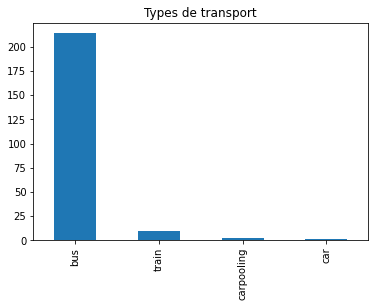

In [16]:
providers["transport_type"].value_counts().plot(kind="bar",title="Types de transport")

<AxesSubplot:title={'center':'wifi'}>

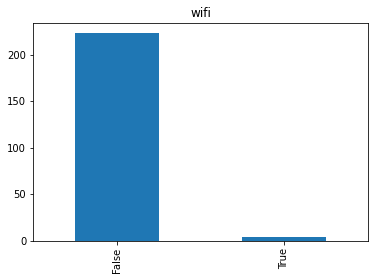

In [17]:
providers["has_wifi"].value_counts().plot(kind="bar",title="wifi")

<AxesSubplot:title={'center':'Bicycle'}>

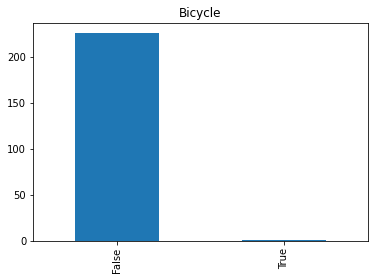

In [18]:
providers["has_bicycle"].value_counts().plot(kind="bar",title="Bicycle")

<AxesSubplot:title={'center':'Plug'}>

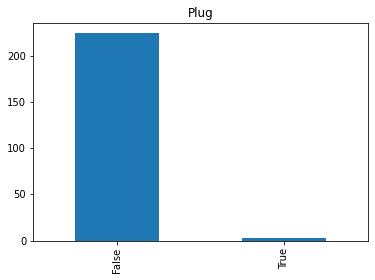

In [19]:
providers["has_plug"].value_counts().plot(kind="bar",title="Plug")

<AxesSubplot:title={'center':'Adjustable Seats'}>

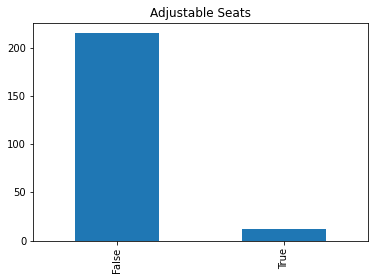

In [20]:
providers["has_adjustable_seats"].value_counts().plot(kind="bar",title="Adjustable Seats")

**Information Extraction** // **Extraction des données** 

In [21]:
#Minimum ticket Price // Prix Minimum
print('Le prix minimum des tickets est : {}'.format(tickets['price_in_cents'].min()))
#Maximum ticket Price// Prix Maximum
print('Le prix maximum des tickets est : {}'.format(tickets['price_in_cents'].max()))
#Average ticket price // Prix moyen
print('Le prix moyen des tickets est : {}'.format(tickets['price_in_cents'].mean() ))


Le prix minimum des tickets est : 300
Le prix maximum des tickets est : 38550
Le prix moyen des tickets est : 4382.711061374178


<AxesSubplot:>

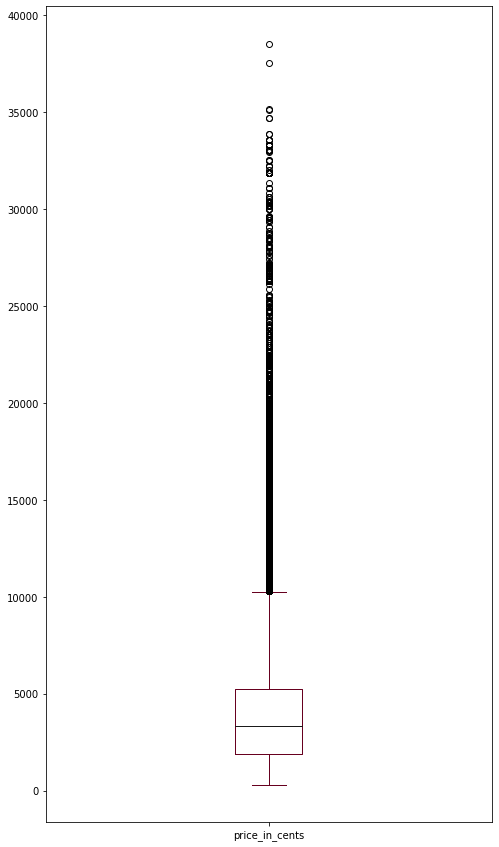

In [22]:
tickets['price_in_cents'].plot(kind="box", colormap="RdGy", figsize=(8,15))

Comme on peut le voir dans le boxplot, il existe plusieurs outliers ce qui indique que les valeurs ne sont pas distribuées homogènement. 


In [23]:
tickets['duration']=pd.to_datetime(tickets['arrival_ts'])-pd.to_datetime(tickets['departure_ts'])

In [24]:
tickets['duration'].head()

0   0 days 06:10:00
1   0 days 17:50:00
2   1 days 07:57:00
3   0 days 21:35:00
4   0 days 21:46:00
Name: duration, dtype: timedelta64[ns]

In [25]:
#Minimum ticket Duration // Duréé Minimum
print('La durée minimum des trajets est : {}'.format(tickets['duration'].min()))
#Maximum ticket Price// Prix Maximum
print('La durée maximum des trajets est : {}'.format(tickets['duration'].max()))
#Average ticket price // Prix moyen
print('La durée moyenne des trajets est : {}'.format(tickets['duration'].mean() ))


La durée minimum des trajets est : 0 days 00:20:00
La durée maximum des trajets est : 20 days 12:51:00
La durée moyenne des trajets est : 0 days 07:04:37.247600043




*   La durée des trajets varie entre 20 minutes et 20 jours .
*   Pour visualiser la durée des trajet, il faut les convertir en des valeurs numériques.




In [26]:
tickets['duration_in_minutes'] = tickets['duration'].dt.total_seconds() / 60

<AxesSubplot:ylabel='Frequency'>

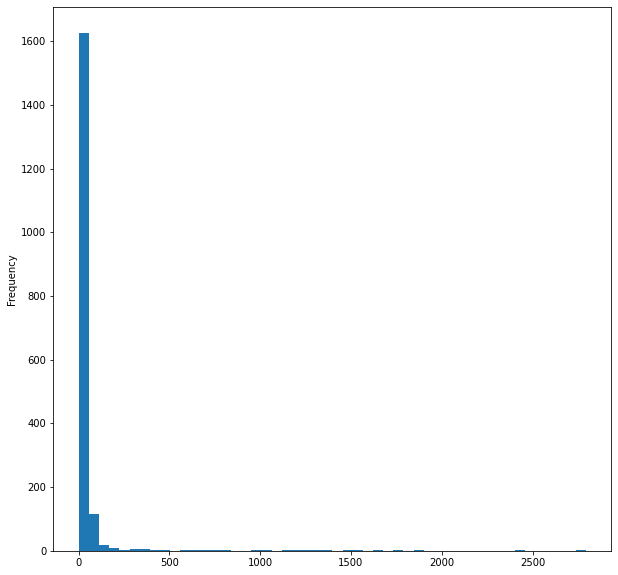

In [27]:
tickets['duration_in_minutes'].value_counts().plot(kind="hist", figsize=(10,10), bins=50)

Les durées des trajets ne sont pas homogènement distribuées.


**différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km)**

On calcule la distance entre le point de départ et le point d'arrivée pour chaque trajet en utilisant les "Longitude" et "Lattitude" des stations et des cités.

J'ai fais quelques recherches sur les méthodes pour calculer la distance. J'ai trouvé cette question sur stackoverflow https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula 

In [28]:
def distance(lat_origin, lon_origin, lat_destination, lon_destination):
    p = pi/180
    a = 0.5 - cos((lat_destination-lat_origin)*p)/2 + cos(lat_origin*p) * cos(lat_destination*p) * (1-cos((lon_destination-lon_origin)*p))/2
    return 12742 * asin(sqrt(a))
def getLat(station_id,table):
    lat = table[table['id']==station_id].latitude.values[0]
    return lat
def getLong(station_id,table):
    long = table[table['id']==station_id].longitude.values[0]
    return long


In [29]:
tickets['distance']=0

In [30]:
def get_middle_stations(middle_stations):
    middle_stations=middle_stations.replace('{','')
    middle_stations=middle_stations.replace('}','')
    return middle_stations.split(',')
    

In [31]:
for index,row in tickets.iterrows():
    if(not math.isnan(row['o_station']) and not math.isnan(row['d_station'])):
        lat_origin = getLat(int(row['o_station']),stations)
        lon_origin = getLong(int(row['o_station']),stations)
        dist= 0
        for station_id in get_middle_stations(row['middle_stations']):
            lat_dest=getLat(int(station_id),stations)
            lon_dest= getLong(int(station_id),stations)
            dist+=distance(lat_origin, lon_origin, lat_dest, lon_dest)
            lat_origin = lat_dest
            lon_origin = lon_dest
        lat_dest = getLat(int(row['d_station']),stations)
        lon_dest = getLong(int(row['d_station']),stations)
        dist+=distance(lat_origin, lon_origin, lat_dest, lon_dest)
    else:
        lat_origin = getLat(int(row['o_city']),cities)
        lon_origin = getLong(int(row['o_city']),cities)
        lat_dest = getLat(int(row['d_city']),cities)
        lon_dest = getLong(int(row['d_city']),cities)
        dist = distance(lat_origin, lon_origin, lat_dest, lon_dest)
    tickets.loc[index,"distance"]=dist 

In [32]:
tickets.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,duration_in_minutes,distance
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,0 days 06:10:00,370.0,503.197167
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00,1070.0,508.560137
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00,1917.0,1085.277123
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00,1295.0,1085.277123
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00,1306.0,630.222814


In [33]:
tickets['distance_category']=''

In [34]:
def distance_category(row):  
    if row['distance']<=200:
        category ='0-200'
    if row['distance']<=800 and row['distance']>200:
        category ='200-800'
    if row['distance']<=2000 and row['distance']>800:
        category ='800-2000'
    if row['distance']>2000:
        category = '2000+'
    return category


tickets['distance_category'] = tickets.apply(distance_category, axis=1)

<AxesSubplot:>

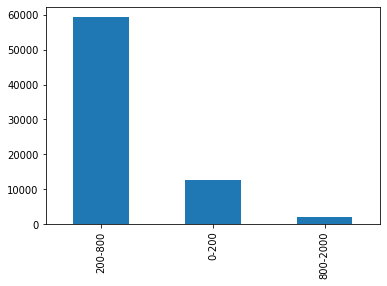

In [35]:
tickets['distance_category'].value_counts().plot(kind="bar")

On remarque qu'il n'existe pas de catégorie de distance > 2000km. La plupart des distances est comprise entre 200 et 800 km .

On va ajouter le type de transport dans le dataFrame Tickets. 

In [36]:
tickets['transport_type']=''

In [37]:
def transport_type(row):
    return providers[providers['id']==row['company']].transport_type.values[0]

In [38]:
tickets['transport_type'] = tickets.apply(transport_type, axis=1)

In [39]:
tickets.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,duration_in_minutes,distance,distance_category,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,0 days 06:10:00,370.0,503.197167,200-800,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00,1070.0,508.560137,200-800,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00,1917.0,1085.277123,800-2000,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00,1295.0,1085.277123,800-2000,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00,1306.0,630.222814,200-800,train


In [40]:
price_in_cents_comparison= tickets.groupby(['distance_category','transport_type'])['price_in_cents',].mean().pivot_table(
                    columns='transport_type',
                    values='price_in_cents',
                    index=['distance_category'],
                )

In [41]:
price_in_cents_comparison

transport_type,bus,carpooling,train
distance_category,,,
0-200,1985.856410,1177.352385,2954.796512
200-800,3394.874969,3218.064310,8828.796567
800-2000,6815.397656,8626.545455,16495.127226


In [42]:
duration_in_min_comparison= tickets.groupby(['distance_category','transport_type'])['duration_in_minutes',].mean().pivot_table(
                    columns='transport_type',
                    values='duration_in_minutes',
                    index=['distance_category'],
                )

In [43]:
duration_in_min_comparison

transport_type,bus,carpooling,train
distance_category,,,
0-200,440.588034,117.122374,258.627422
200-800,888.341658,285.787874,447.531003
800-2000,1628.239063,786.013986,763.595420


<AxesSubplot:xlabel='distance_category'>

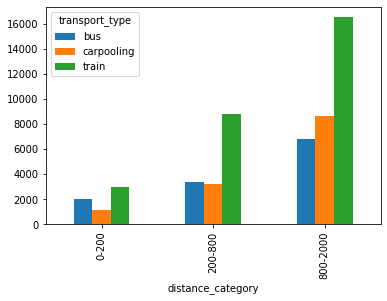

In [44]:
price_in_cents_comparison.plot(kind="bar")

On peut remarquer que les frais de transport par train sont plus élevés que les autres moyens de transport pour toutes les catégories de distance. Pour les deux autres types de transport, tout dépend de la distance.

<AxesSubplot:xlabel='distance_category'>

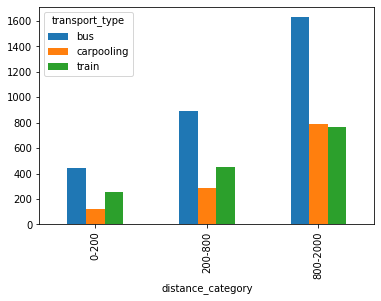

In [45]:
duration_in_min_comparison.plot(kind="bar")

On remarque que le bus est le plus lent moyen de transport. Pour les longues distances, le train est un peu plus rapide que le couvoiturage, pour les distances entre 0 et 800km, le couvoiturage est plus rapide.

Si la distance est entre 0 et 800km, il serait mieux d'opter pour le covoiturage. Il est le plus rapide et le moins cher. Le covoiturage est un bon choix aussi pour la catégorie entre 800km et 2000km puisqu'il y a un bon rapport temps/prix

**Prédiction des prix des tickets**

Pour prédire les prix des tickets, je vais experimenter avec un modèle d'arbre de décision. 

In [46]:
tickets.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,duration_in_minutes,distance,distance_category,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,0 days 06:10:00,370.0,503.197167,200-800,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00,1070.0,508.560137,200-800,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00,1917.0,1085.277123,800-2000,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00,1295.0,1085.277123,800-2000,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00,1306.0,630.222814,200-800,train


In [47]:
predictions_table= pd.merge(tickets,providers, left_on="company", right_on="id", how="inner")

In [48]:
predictions_table.head()

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,id_y,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type_y
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,...,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
1,6795030,8385,NaN,NaN,2017-10-06 05:30:00+00,2017-10-06 08:30:00+00,1800,2017-10-01 01:03:18.948+00,NaN,NaN,...,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
2,6795031,8385,NaN,NaN,2017-10-06 07:00:42+00,2017-10-06 09:30:42+00,2150,2017-10-01 01:03:18.948+00,NaN,NaN,...,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
3,6795032,8385,NaN,NaN,2017-10-06 07:10:00+00,2017-10-06 09:40:00+00,1700,2017-10-01 01:03:18.948+00,NaN,NaN,...,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
4,6795033,8385,NaN,NaN,2017-10-06 10:00:00+00,2017-10-06 12:50:00+00,1700,2017-10-01 01:03:18.948+00,NaN,NaN,...,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling


Il y a plusieurs colonnes qui n'ont pas vraiment du sens lorsqu'il s'agit de prédiction des prix.

In [49]:
predictions_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   id_x                  74168 non-null  int64          
 1   company               74168 non-null  int64          
 2   o_station             32727 non-null  float64        
 3   d_station             32727 non-null  float64        
 4   departure_ts          74168 non-null  object         
 5   arrival_ts            74168 non-null  object         
 6   price_in_cents        74168 non-null  int64          
 7   search_ts             74168 non-null  object         
 8   middle_stations       32727 non-null  object         
 9   other_companies       32727 non-null  object         
 10  o_city                74168 non-null  int64          
 11  d_city                74168 non-null  int64          
 12  duration              74168 non-null  timedelta64[ns]
 13  d

In [50]:
predictions_table.drop(['o_station','d_station','search_ts','middle_stations','other_companies','duration','distance','id_y','company_id','provider_id','name','fullname','transport_type_y'],axis=1,inplace=True)

In [51]:
predictions_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  74168 non-null  int64  
 1   company               74168 non-null  int64  
 2   departure_ts          74168 non-null  object 
 3   arrival_ts            74168 non-null  object 
 4   price_in_cents        74168 non-null  int64  
 5   o_city                74168 non-null  int64  
 6   d_city                74168 non-null  int64  
 7   duration_in_minutes   74168 non-null  float64
 8   distance_category     74168 non-null  object 
 9   transport_type_x      74168 non-null  object 
 10  has_wifi              74168 non-null  object 
 11  has_plug              74168 non-null  object 
 12  has_adjustable_seats  74168 non-null  object 
 13  has_bicycle           74168 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 8.5+ MB


In [52]:
predictions_table.head()

,id_x,company,departure_ts,arrival_ts,price_in_cents,o_city,d_city,duration_in_minutes,distance_category,transport_type_x,has_wifi,has_plug,has_adjustable_seats,has_bicycle
0,6795025,8385,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,611,542,370.0,200-800,carpooling,False,False,False,False
1,6795030,8385,2017-10-06 05:30:00+00,2017-10-06 08:30:00+00,1800,628,453,180.0,200-800,carpooling,False,False,False,False
2,6795031,8385,2017-10-06 07:00:42+00,2017-10-06 09:30:42+00,2150,628,453,150.0,200-800,carpooling,False,False,False,False
3,6795032,8385,2017-10-06 07:10:00+00,2017-10-06 09:40:00+00,1700,628,453,150.0,200-800,carpooling,False,False,False,False
4,6795033,8385,2017-10-06 10:00:00+00,2017-10-06 12:50:00+00,1700,628,453,170.0,200-800,carpooling,False,False,False,False


In [53]:
predictions_table['departure_month']=pd.to_datetime(predictions_table['departure_ts'], format = "%Y-%m-%d %H:%M:%S").dt.month
predictions_table['departure_year']=pd.to_datetime(predictions_table['departure_ts'], format = "%Y-%m-%d %H:%M:%S").dt.year
predictions_table['arrival_month_month']=pd.to_datetime(predictions_table['arrival_ts'], format = "%Y-%m-%d %H:%M:%S").dt.month
predictions_table['arrival_year']=pd.to_datetime(predictions_table['arrival_ts'], format = "%Y-%m-%d %H:%M:%S").dt.year


In [54]:
predictions_table.head()

,id_x,company,departure_ts,arrival_ts,price_in_cents,o_city,d_city,duration_in_minutes,distance_category,transport_type_x,has_wifi,has_plug,has_adjustable_seats,has_bicycle,departure_month,departure_year,arrival_month_month,arrival_year
0,6795025,8385,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,611,542,370.0,200-800,carpooling,False,False,False,False,10,2017,10,2017
1,6795030,8385,2017-10-06 05:30:00+00,2017-10-06 08:30:00+00,1800,628,453,180.0,200-800,carpooling,False,False,False,False,10,2017,10,2017
2,6795031,8385,2017-10-06 07:00:42+00,2017-10-06 09:30:42+00,2150,628,453,150.0,200-800,carpooling,False,False,False,False,10,2017,10,2017
3,6795032,8385,2017-10-06 07:10:00+00,2017-10-06 09:40:00+00,1700,628,453,150.0,200-800,carpooling,False,False,False,False,10,2017,10,2017
4,6795033,8385,2017-10-06 10:00:00+00,2017-10-06 12:50:00+00,1700,628,453,170.0,200-800,carpooling,False,False,False,False,10,2017,10,2017


In [55]:
def origin_city(row):
    return cities[cities['id']==row['o_city']].unique_name.values[0]

In [56]:
predictions_table['origin_city'] = predictions_table.apply(origin_city, axis=1)

In [57]:
def destination_city(row):
    return cities[cities['id']==row['d_city']].unique_name.values[0]

In [58]:
predictions_table['destination_city'] = predictions_table.apply(destination_city, axis=1)

In [59]:
predictions_table.head()

,id_x,company,departure_ts,arrival_ts,price_in_cents,o_city,d_city,duration_in_minutes,distance_category,transport_type_x,has_wifi,has_plug,has_adjustable_seats,has_bicycle,departure_month,departure_year,arrival_month_month,arrival_year,origin_city,destination_city
0,6795025,8385,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,611,542,370.0,200-800,carpooling,False,False,False,False,10,2017,10,2017,orleans,montpellier
1,6795030,8385,2017-10-06 05:30:00+00,2017-10-06 08:30:00+00,1800,628,453,180.0,200-800,carpooling,False,False,False,False,10,2017,10,2017,paris,lille
2,6795031,8385,2017-10-06 07:00:42+00,2017-10-06 09:30:42+00,2150,628,453,150.0,200-800,carpooling,False,False,False,False,10,2017,10,2017,paris,lille
3,6795032,8385,2017-10-06 07:10:00+00,2017-10-06 09:40:00+00,1700,628,453,150.0,200-800,carpooling,False,False,False,False,10,2017,10,2017,paris,lille
4,6795033,8385,2017-10-06 10:00:00+00,2017-10-06 12:50:00+00,1700,628,453,170.0,200-800,carpooling,False,False,False,False,10,2017,10,2017,paris,lille


In [60]:
predictions_table.drop(['departure_ts','arrival_ts','o_city','d_city'], axis=1, inplace =True)

In [61]:
predictions_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  74168 non-null  int64  
 1   company               74168 non-null  int64  
 2   price_in_cents        74168 non-null  int64  
 3   duration_in_minutes   74168 non-null  float64
 4   distance_category     74168 non-null  object 
 5   transport_type_x      74168 non-null  object 
 6   has_wifi              74168 non-null  object 
 7   has_plug              74168 non-null  object 
 8   has_adjustable_seats  74168 non-null  object 
 9   has_bicycle           74168 non-null  object 
 10  departure_month       74168 non-null  int64  
 11  departure_year        74168 non-null  int64  
 12  arrival_month_month   74168 non-null  int64  
 13  arrival_year          74168 non-null  int64  
 14  origin_city           74168 non-null  object 
 15  destination_city   

In [62]:
predictions_table["has_wifi"] = predictions_table["has_wifi"].astype(int)
predictions_table["has_plug"] = predictions_table["has_plug"].astype(int)
predictions_table["has_adjustable_seats"] = predictions_table["has_adjustable_seats"].astype(int)
predictions_table["has_bicycle"] = predictions_table["has_bicycle"].astype(int)

In [63]:
distance_category= pd.get_dummies(predictions_table['distance_category'], prefix = 'distance_category')
transport_type= pd.get_dummies(predictions_table['transport_type_x'], prefix = 'transport_type')
origin=pd.get_dummies(predictions_table['origin_city'], prefix = 'origin')
destination=pd.get_dummies(predictions_table['destination_city'], prefix = 'destination')


In [64]:
predictions_table= pd.concat([predictions_table,distance_category,transport_type,origin,destination], axis=1)
predictions_table.head()

,id_x,company,price_in_cents,duration_in_minutes,distance_category,transport_type_x,has_wifi,has_plug,has_adjustable_seats,has_bicycle,...,destination_vicenza,destination_vichy,destination_vienna,destination_vienne,destination_villefranche-sur-cher,destination_vitre,destination_voiron,destination_warsaw,destination_zurich,destination_сердика
0,6795025,8385,4550,370.0,200-800,carpooling,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6795030,8385,1800,180.0,200-800,carpooling,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6795031,8385,2150,150.0,200-800,carpooling,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6795032,8385,1700,150.0,200-800,carpooling,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6795033,8385,1700,170.0,200-800,carpooling,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
predictions_table.drop(['distance_category','transport_type_x','origin_city','destination_city'], axis=1,inplace=True)

In [66]:
def get_company_name(row):
    return providers[providers['id']==int(row['company'])].fullname.values[0]

In [67]:
predictions_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Columns: 656 entries, id_x to destination_сердика
dtypes: float64(1), int32(4), int64(7), uint8(644)
memory usage: 51.8 MB


In [68]:
predictions_table['company_name'] = predictions_table.apply(get_company_name, axis=1)

In [69]:
company_name=pd.get_dummies(predictions_table['company_name'], prefix = 'company')


In [70]:
predictions_table= pd.concat([predictions_table,company_name], axis=1)


In [71]:
predictions_table.head()

,id_x,company,price_in_cents,duration_in_minutes,has_wifi,has_plug,has_adjustable_seats,has_bicycle,departure_month,departure_year,...,company_Isilines,company_National Express,company_Navette Keolis,company_Navette de Vatry,company_Ouibus,company_Student Agency,company_TER,company_TGV,company_Thalys,company_Vatry
0,6795025,8385,4550,370.0,0,0,0,0,10,2017,...,0,0,0,0,0,0,0,0,0,0
1,6795030,8385,1800,180.0,0,0,0,0,10,2017,...,0,0,0,0,0,0,0,0,0,0
2,6795031,8385,2150,150.0,0,0,0,0,10,2017,...,0,0,0,0,0,0,0,0,0,0
3,6795032,8385,1700,150.0,0,0,0,0,10,2017,...,0,0,0,0,0,0,0,0,0,0
4,6795033,8385,1700,170.0,0,0,0,0,10,2017,...,0,0,0,0,0,0,0,0,0,0


In [72]:
predictions_table.drop(['company','id_x','company_name'], axis=1, inplace=True)

In [73]:
predictions_table.head()

,price_in_cents,duration_in_minutes,has_wifi,has_plug,has_adjustable_seats,has_bicycle,departure_month,departure_year,arrival_month_month,arrival_year,...,company_Isilines,company_National Express,company_Navette Keolis,company_Navette de Vatry,company_Ouibus,company_Student Agency,company_TER,company_TGV,company_Thalys,company_Vatry
0,4550,370.0,0,0,0,0,10,2017,10,2017,...,0,0,0,0,0,0,0,0,0,0
1,1800,180.0,0,0,0,0,10,2017,10,2017,...,0,0,0,0,0,0,0,0,0,0
2,2150,150.0,0,0,0,0,10,2017,10,2017,...,0,0,0,0,0,0,0,0,0,0
3,1700,150.0,0,0,0,0,10,2017,10,2017,...,0,0,0,0,0,0,0,0,0,0
4,1700,170.0,0,0,0,0,10,2017,10,2017,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X = predictions_table.drop('price_in_cents', axis=1)
y = predictions_table['price_in_cents']


In [75]:
model = DecisionTreeRegressor()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [79]:
mse(y_test, model.predict(X_test))

1329149.7135263293

In [81]:
model.score(X_test, y_test)*100

90.71886445623728

Le modèle est précis à 90 %